In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
DDP = pd.read_csv("geneVSorgans.csv")

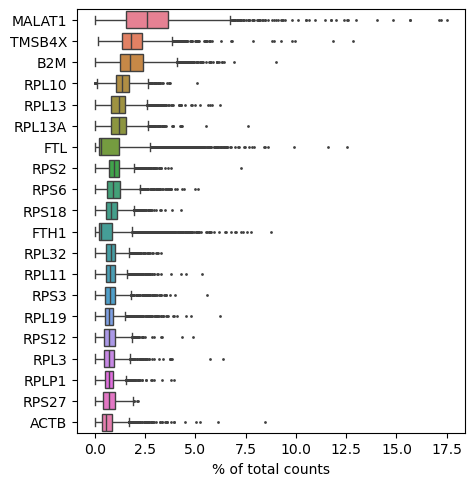

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [3]:
adata = sc.read_10x_mtx('data/filtered_gene_bc_matrices/hg19/',var_names='gene_symbols',cache=True)
adata.var_names_make_unique()
sc.pl.highest_expr_genes(adata, n_top=20, )
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

In [4]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [7]:
pbmcgen = adata.var_names.tolist()
dddgen = DDP["gene symbol"].tolist()

# Calculate the number of overlapping genes
overlap_count = len(set(pbmcgen).intersection(dddgen))

print("Number of overlapping genes:", overlap_count)

Number of overlapping genes: 201


In [8]:
diffgen = list(set(pbmcgen).intersection(dddgen))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
subset_adata = adata[:, diffgen]
subset_adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
NOG,ENSG00000183691,29,False,29,0.013333,98.925926,36.0,True,0.057560,2.644146,1.767352,-1.801337e-11,0.181316
UBE3A,ENSG00000114062,143,False,143,0.065185,94.703704,176.0,True,0.251372,2.995380,2.460852,6.495957e-11,0.391499
CAMK2G,ENSG00000148660,153,False,153,0.074444,94.333333,201.0,True,0.272025,3.297300,3.056985,-1.511016e-10,0.403817
DISP1,ENSG00000154309,10,False,10,0.004074,99.629630,11.0,True,0.019576,2.085635,0.664586,-5.216183e-11,0.107985
MAP3K7,ENSG00000135341,89,False,89,0.041111,96.703704,111.0,True,0.162917,3.396932,3.253706,-7.660993e-11,0.300394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRBA,ENSG00000198589,147,False,147,0.061111,94.555556,165.0,True,0.236087,2.157182,0.805855,-8.472988e-11,0.390381
JAM3,ENSG00000166086,7,False,7,0.002593,99.740741,7.0,True,0.013873,2.021288,0.537537,-1.774446e-11,0.091540
GATA2,ENSG00000179348,4,False,4,0.003333,99.851852,9.0,True,0.012858,2.327742,1.142621,-9.065362e-12,0.085889
SNX3,ENSG00000112335,1246,False,1246,0.786296,53.851852,2123.0,True,1.444208,2.887799,0.661718,-2.210258e-10,0.991107


In [9]:
new_cluster_names = [
    'Lymphoid', 'Myeloid',
    '2', '3',
    '4', '5',
    '6', '7']
subset_adata.rename_categories('leiden', new_cluster_names)


subset_adata.obs['leiden'][subset_adata.obs['leiden'].isin(['0', '2','3','4'])]='Lymphoid'
subset_adata.obs['leiden'][subset_adata.obs['leiden'].isin(['1', '5','6','7'])]='Myeloid'
subset_adata.obs['leiden']=subset_adata.obs['leiden'].astype('str').astype('category')
### Reorder and rename the Leiden
subset_adata.obs['leiden'].cat.rename_categories(np.arange(len(np.unique(subset_adata.obs['leiden']))).astype('str'))

/Users/njj83/anaconda3/envs/scanpy_louise/lib/python3.8/site-packages/anndata/_core/anndata.py:1147: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obs[key] = self.obs[key].cat.rename_categories(categories)


AAACATACAACCAC-1    0
AAACATTGAGCTAC-1    0
AAACATTGATCAGC-1    0
AAACCGTGCTTCCG-1    0
AAACCGTGTATGCG-1    1
                   ..
TTTCGAACTCTCAT-1    1
TTTCTACTGAGGCA-1    0
TTTCTACTTCCTCG-1    0
TTTGCATGAGAGGC-1    0
TTTGCATGCCTCAC-1    0
Name: leiden, Length: 2638, dtype: category
Categories (2, object): ['0', '1']

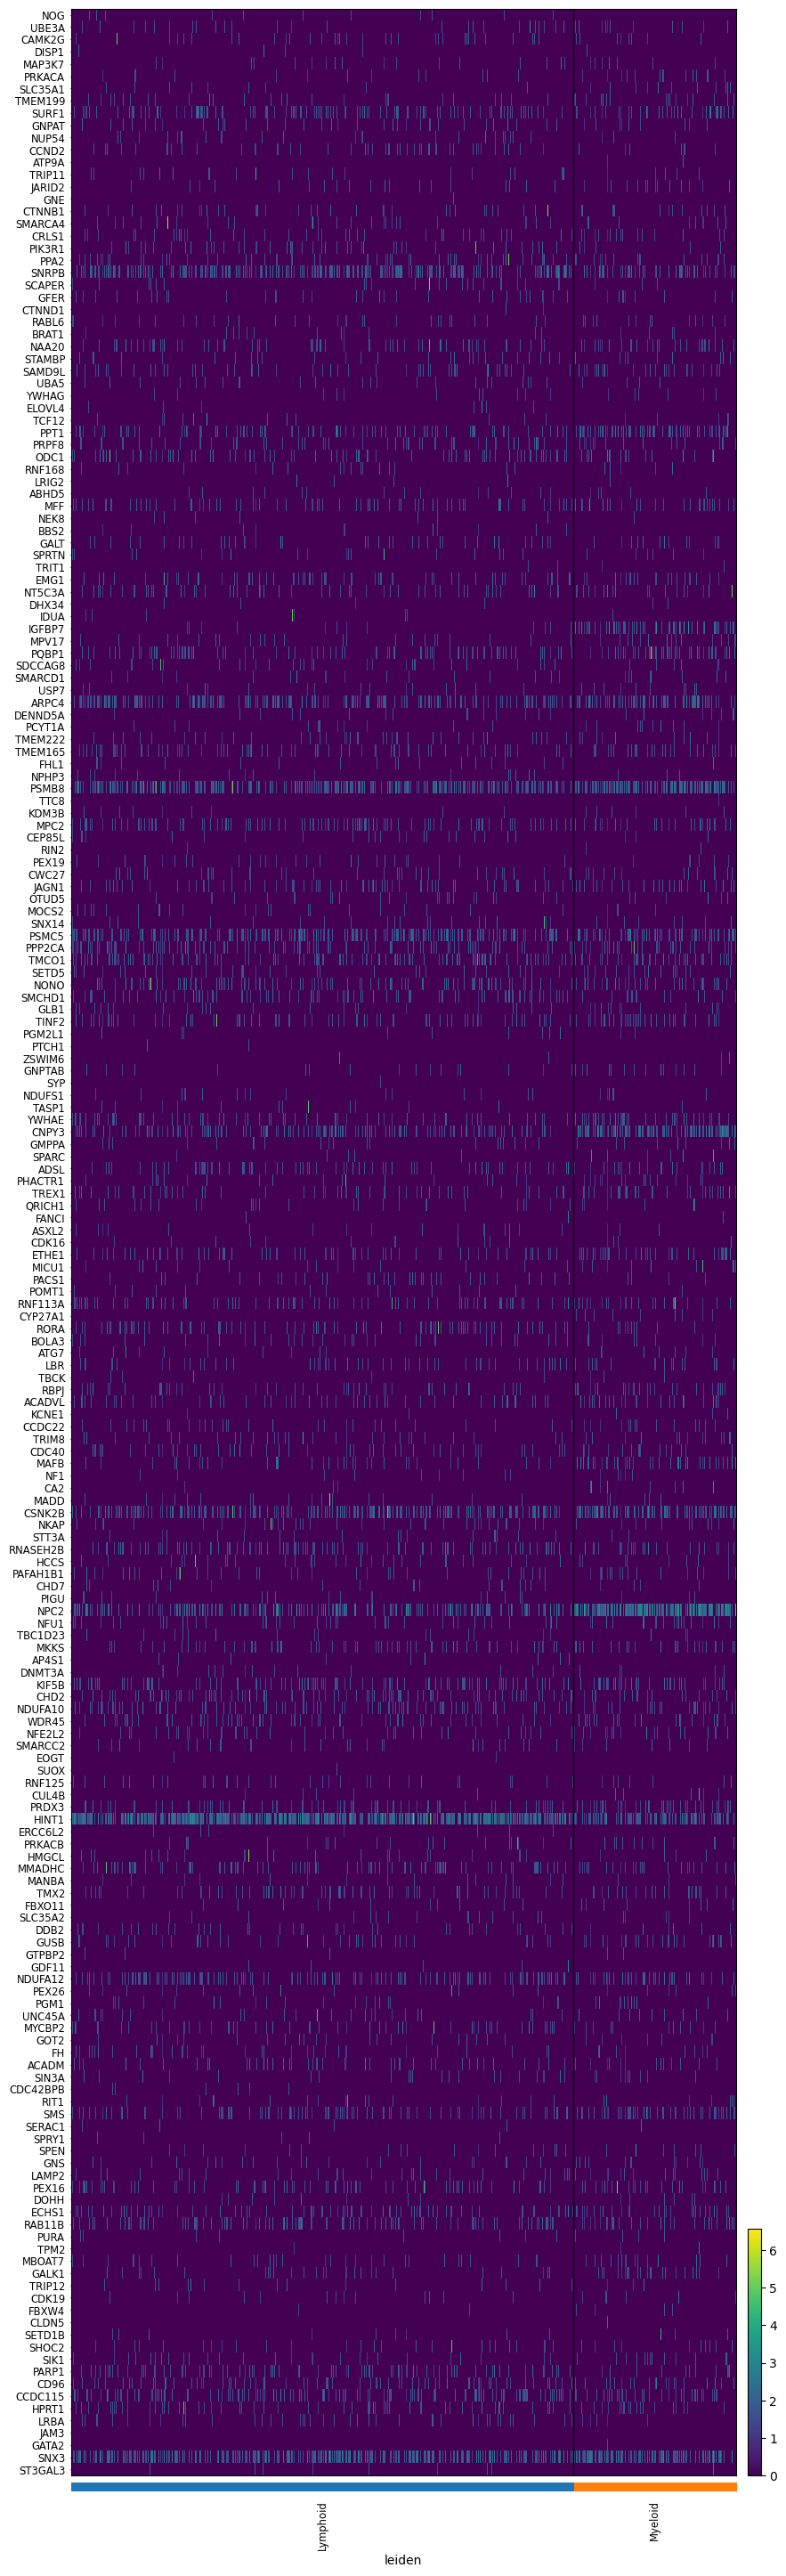

In [39]:
markers = subset_adata.var_names.tolist()
SD = sc.pl.heatmap(subset_adata, markers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Allgenes.pdf")

In [ ]:
sc.pl.clustermap(subset_adata, use_raw=False)

In [13]:
# Filter rows for Skin
Skin =  DDP.loc[DDP['Skin']==True]
Skin = Skin["gene symbol"]
Skin = list(Skin)

# Filter rows for Nervous
Nervous = DDP.loc[(DDP['Peripheral'] == True) | (DDP['Brain'] == True)]
Nervous = Nervous["gene symbol"]
Nervous = list(Nervous)  

# Filter rows for Musco
Musco = DDP.loc[(DDP['Skeleton'] == True) | (DDP['Musculature'] == True)]
Musco = Musco["gene symbol"]
Musco = list(Musco)  

# Filter rows for Circulatory
Circulatory = DDP.loc[(DDP['Heart'] == True) | (DDP['Bone Marrow'] == True)]
Circulatory = Circulatory["gene symbol"]
Circulatory = list(Circulatory) 

In [19]:
diffgenSkin = list(set(pbmcgen).intersection(Skin))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcSkin = subset_adata[:, diffgenSkin]

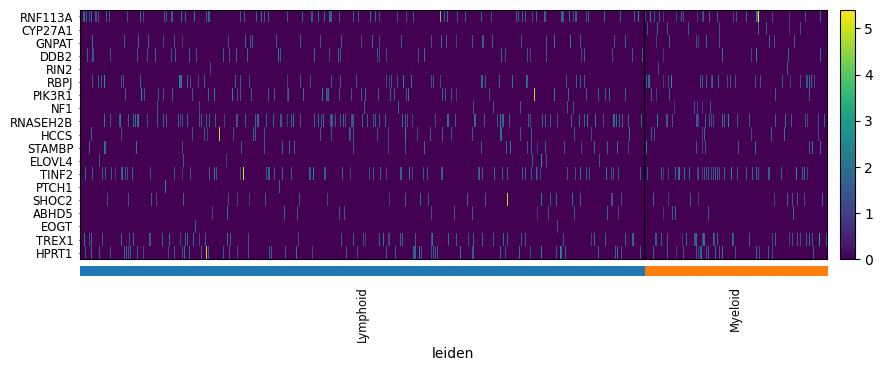

In [40]:
Smarkers = pbmcSkin.var_names.tolist()
SS = sc.pl.heatmap(pbmcSkin, Smarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Skin.pdf")

In [22]:
diffgenNervous = list(set(pbmcgen).intersection(Nervous))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcNervous = subset_adata[:, diffgenNervous]

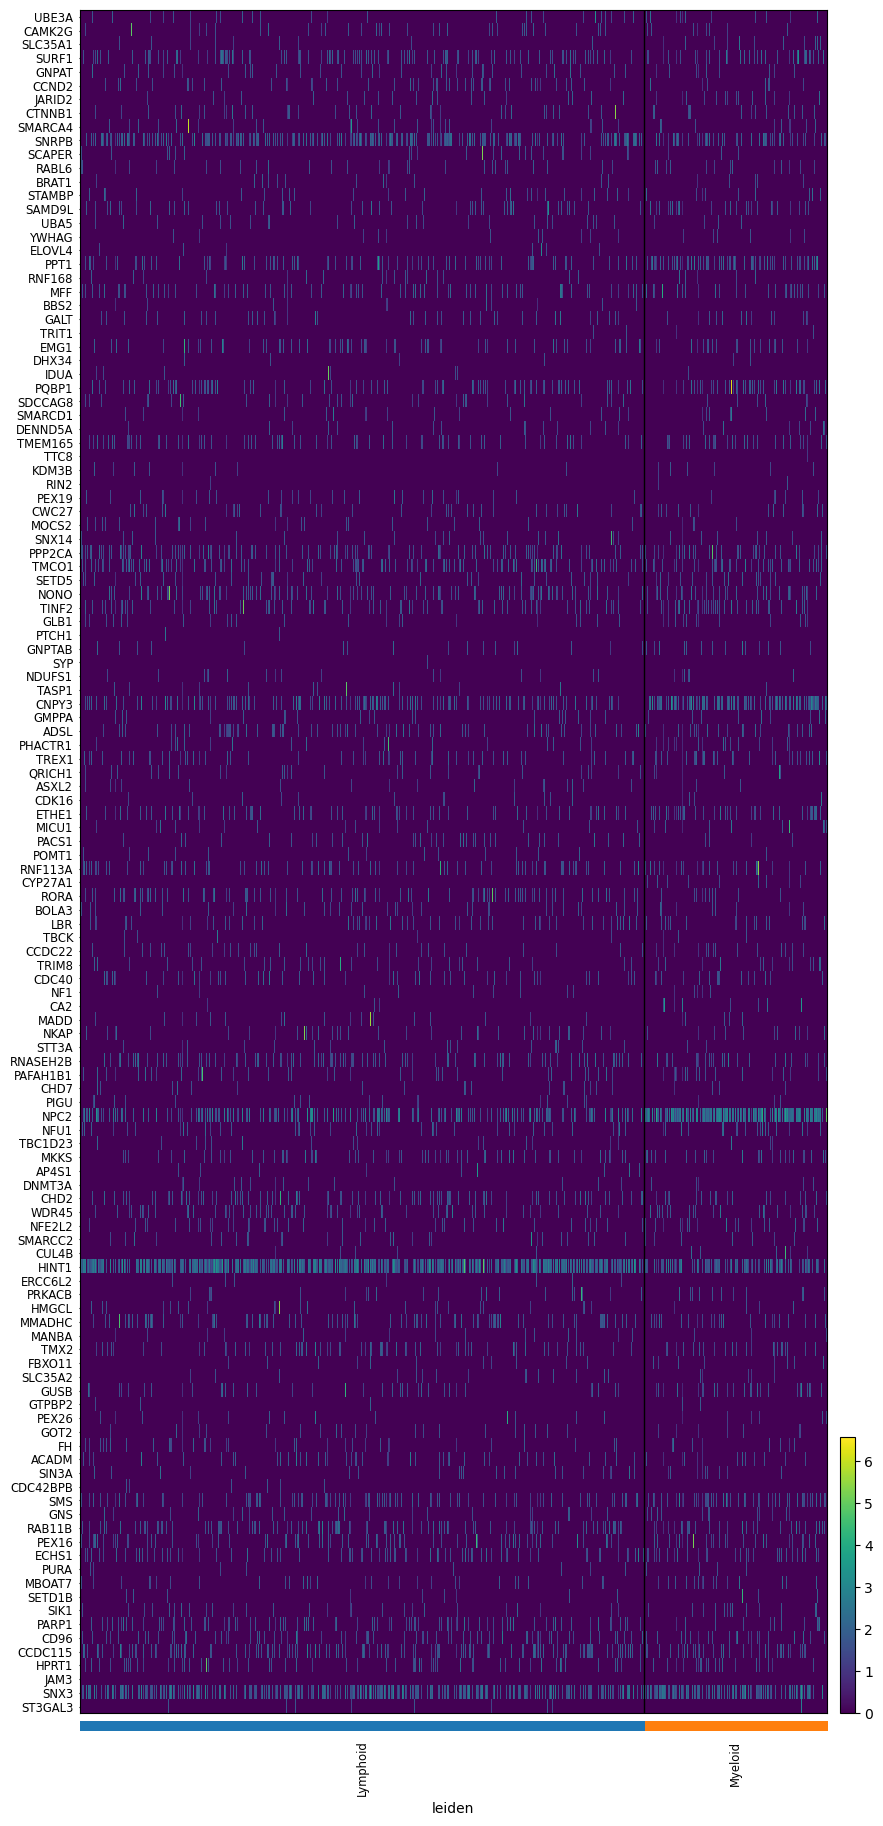

In [41]:
Nmarkers = pbmcNervous.var_names.tolist()
NE = sc.pl.heatmap(pbmcNervous, Nmarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Nervous.pdf")

In [25]:
diffgenMusco = list(set(pbmcgen).intersection(Musco))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcMusco = subset_adata[:, diffgenMusco]

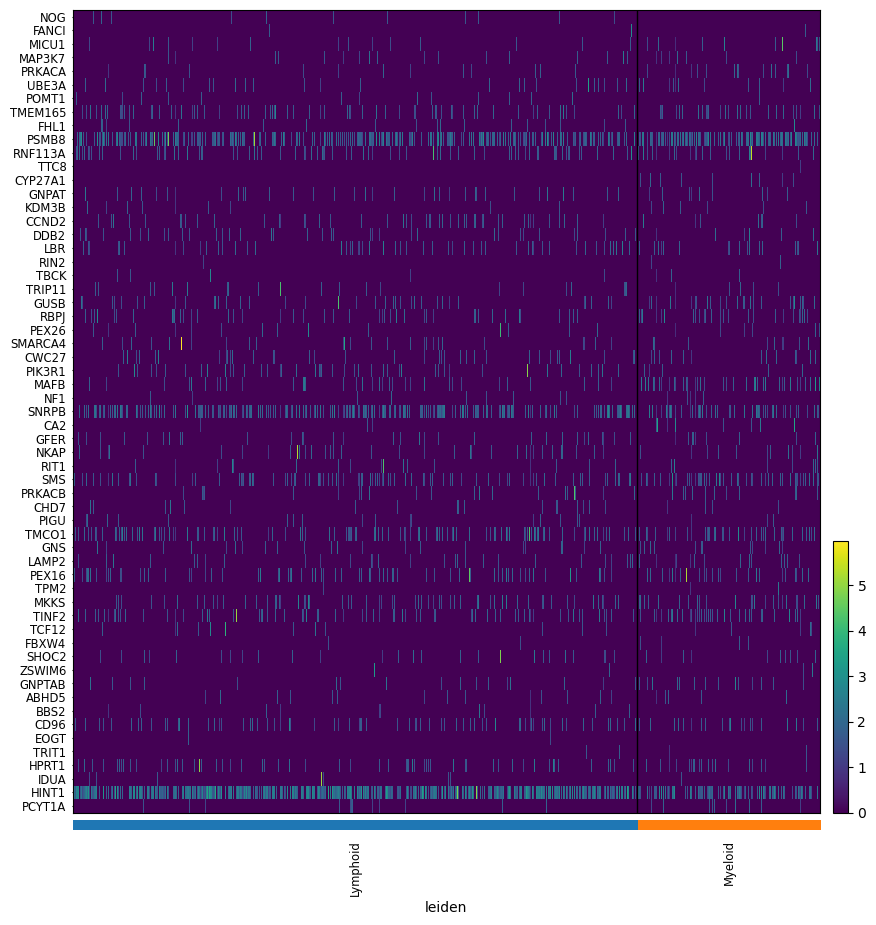

In [42]:
Mmarkers = pbmcMusco.var_names.tolist()
MU = sc.pl.heatmap(pbmcMusco, Mmarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Musco.pdf")

In [27]:
diffgenCirc = list(set(pbmcgen).intersection(Circulatory))

# Subset 'pbmc' based on the difference between its variable names and 'diffgenCirc'
pbmcCirc = subset_adata[:, diffgenCirc]

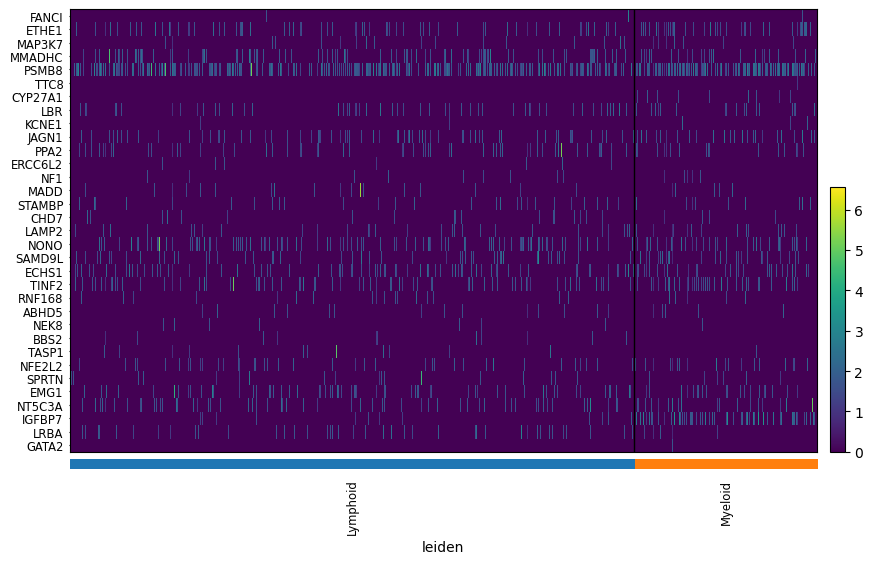

In [43]:
Cmarkers = pbmcCirc.var_names.tolist()
CI = sc.pl.heatmap(pbmcCirc, Cmarkers, groupby='leiden', show_gene_labels=True, swap_axes=True, save="Circulatory.pdf")

<Figure size 640x480 with 0 Axes>